# Given features we now want to predict using an SVM

In [1]:
# Imports
import numpy as np 
import sklearn
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA

%matplotlib inline

In [3]:
# Load dataa
data = np.load('./dataset/data.npy')
image_dict = data.item().get('image_dict')
y_dict = data.item().get('y_dict')

In [4]:
# Convert dict to numpy array
image_list = []
y_list = []
for key in image_dict:
    image_list.append(image_dict[key])
    y_list.append(y_dict[key])
image_list = np.array(image_list)
y_list = np.array(y_list)

In [12]:
clf = SVC(max_iter=1000,verbose=True,class_weight={0:0.134,1:0.866})

In [13]:
clf.fit(image_list,y_list)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight={0: 0.134, 1: 0.866}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=1000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [14]:
clf.predict(image_list)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

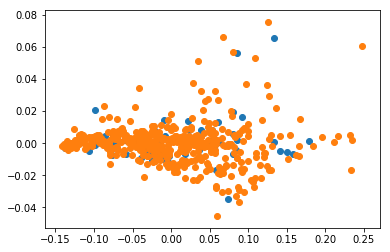

In [11]:
pca = PCA(n_components=2)
pca.fit(image_list)
image_2d = pca.fit_transform(image_list)

gr = []
fr = []
for i, y in enumerate(y_dict):
    y = y_dict[y]
    if y==1:
        gr.append(image_2d[i])
    else:
        fr.append(image_2d[i])
gr = np.array(gr)        
fr = np.array(fr)        
plt.scatter(gr[:,0],gr[:,1],label='tampered')
plt.scatter(fr[:,0],fr[:,1],label='real')